In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import data from excel
df = pd.read_csv('FINAL_DOAN_2020-08-11_Sentences.csv', encoding = "ISO-8859-1")
results_df = pd.DataFrame(df, columns = ['System', 'Sentence', 'Code'])

print(results_df.head(5))

       System Sentence  Code
0  Hybrid SMT     S01a    -1
1  Hybrid SMT     S01b    -1
2  Hybrid SMT     S01c    -1
3  Hybrid SMT     S01d    -1
4  Hybrid SMT     S01e    -1


In [2]:
#pivot df
challenge_set = results_df.pivot('System', 'Sentence', 'Code')

#reorder systems
challenge_set.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
challenge_set.sort_index(level=0, inplace=True)

print(challenge_set.head(5))
challenge_set.to_csv('pivot_challenge_set.csv')

Sentence    S01a  S01b  S01c  S01d  S01e  S01f  S01g  S01h  S02a  S02b  ...  \
System                                                                  ...   
Hybrid SMT    -1    -1    -1    -1    -1    -1    -1    -1     1     1  ...   
CNN            1    -1    -1    -1    -1    -1    -1    -1    -1     1  ...   
RNN           -1     1     1     1     1     1     1     1     1     1  ...   
Attention      1     1    -1     1     1     1    -1     1    -1     1  ...   
Google         1     1     1     1     1     1     1     1    -1    -1  ...   

Sentence    S17g  S17h  S18a  S18b  S18c  S18d  S18e  S18f  S18g  S18h  
System                                                                  
Hybrid SMT    -1    -1    -1     1     1     1    -1    -1     1     1  
CNN           -1    -1    -1     1    -1    -1    -1    -1     1    -1  
RNN           -1    -1    -1     1     1     1    -1     1     1    -1  
Attention     -1     1    -1    -1    -1    -1    -1    -1    -1    -1  
Google  

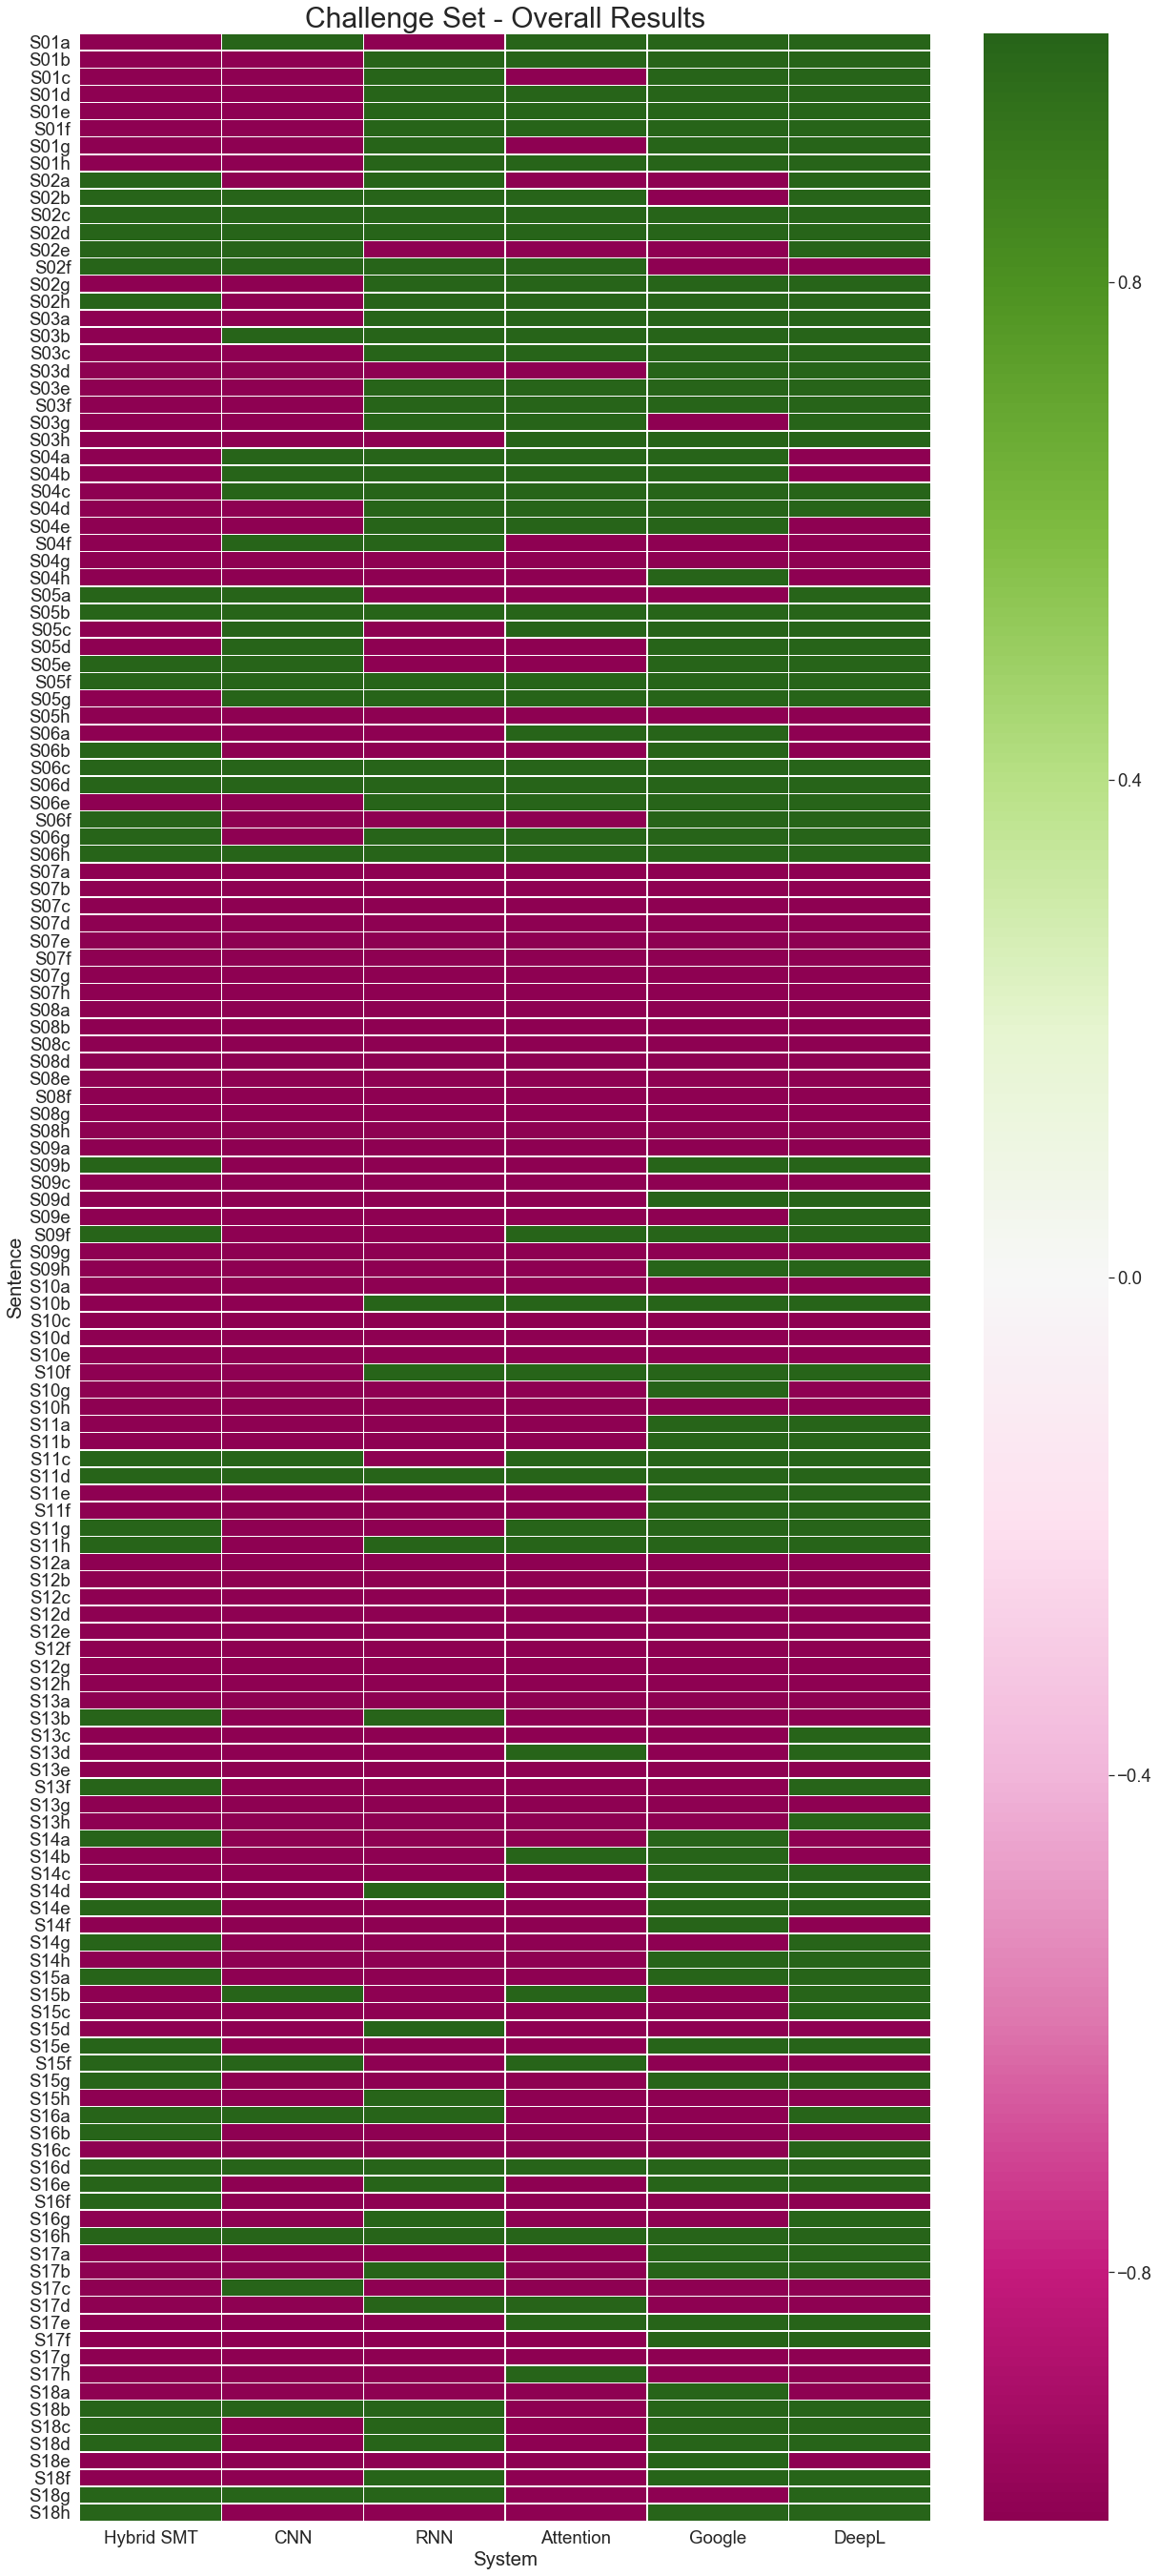

In [3]:
#create heatmap for overall results
challenge_set_transposed = challenge_set.transpose()

plt.figure(figsize=(20,48))
sns.set(font_scale=1.7)

display_cs = sns.heatmap(challenge_set_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")

plt.title("Challenge Set - Overall Results", fontsize =30)

figure = display_cs.get_figure()    
figure.savefig('cs_heatmap.png', dpi=400)

Text(0.5, 1, 'Results for short sentences')

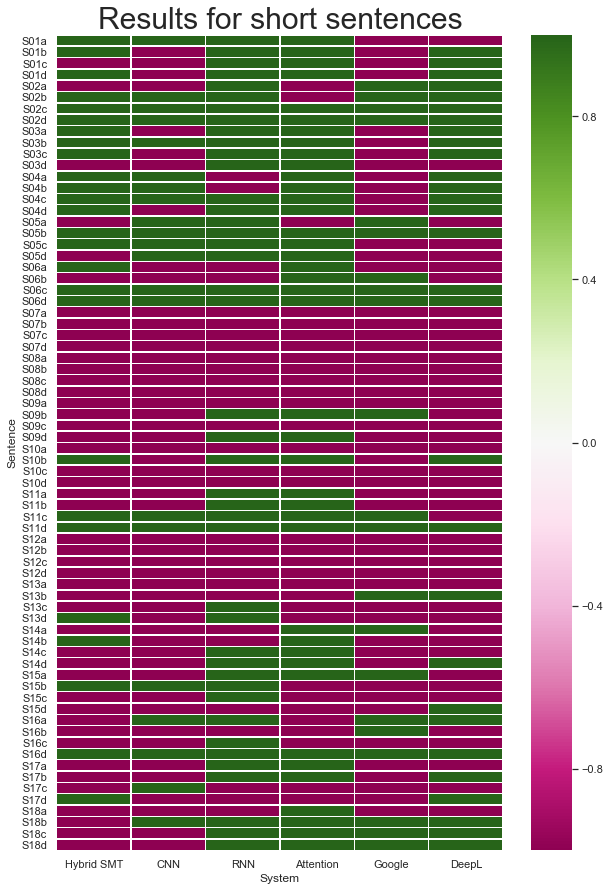

In [4]:
#display results for short sentences

short_sentences = pd.DataFrame(df, columns = ['System', 'Sentence', 'Code', 'Short_Long'])
short_df = short_sentences.loc[short_sentences['Short_Long'] == 'S']
                        
#pivot df for short sentences
short_results = short_df.pivot('System', 'Sentence', 'Code')

#reorder systems
short_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
short_results.sort_index(level=0, inplace=True)

#create heatmap for short sentences
sns.set(font_scale=1.0)
short_results_transposed = short_results.transpose()

plt.figure(figsize=(10,15))

display_cs = sns.heatmap(short_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Results for short sentences", fontsize =30)

Text(0.5, 1, 'Results for long sentences')

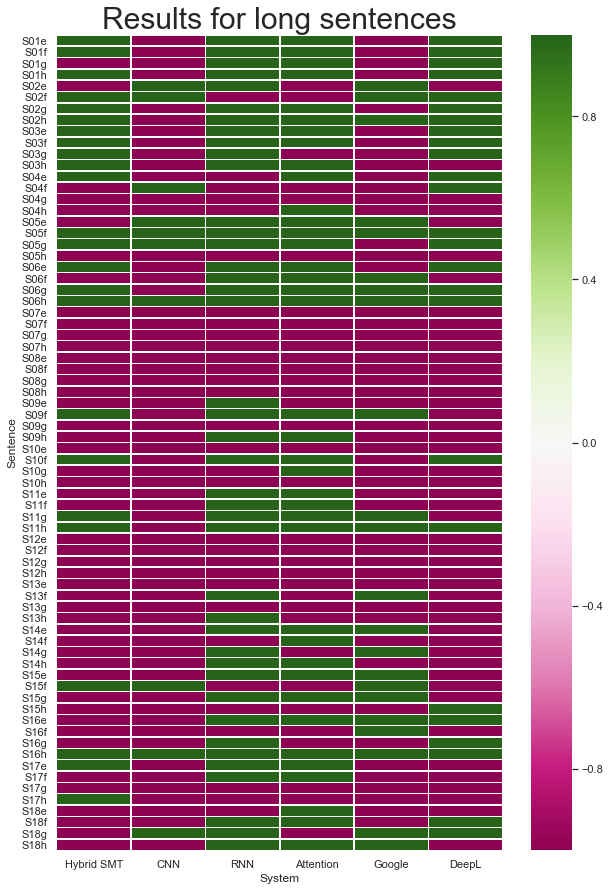

In [5]:
#display results for long sentences

short_sentences = pd.DataFrame(df, columns = ['System', 'Sentence', 'Code', 'Short_Long'])
long_df = short_sentences.loc[short_sentences['Short_Long'] == 'L']
                        
#pivot df for long sentences
long_results = long_df.pivot('System', 'Sentence', 'Code')

#reorder systems
long_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
long_results.sort_index(level=0, inplace=True)

#create heatmap for long sentences
sns.set(font_scale=1.0)
long_results_transposed = long_results.transpose()

plt.figure(figsize=(10,15))

display_cs = sns.heatmap(long_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Results for long sentences", fontsize =30)

Text(0.5, 1, 'Challenge located before the propositions')

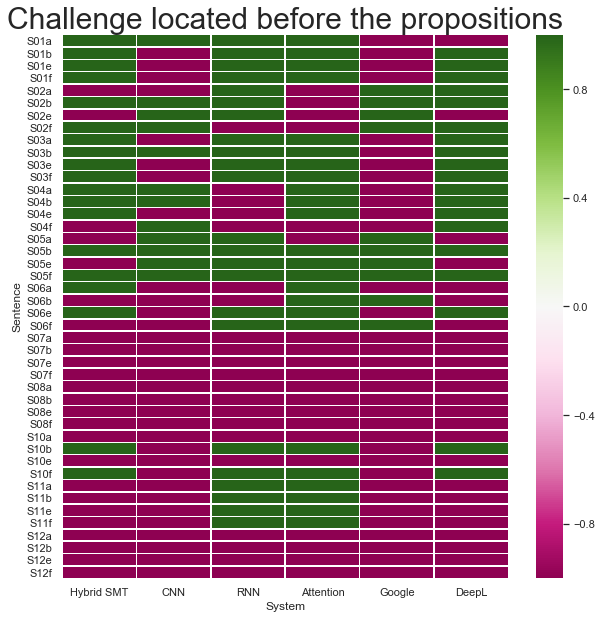

In [6]:
#display results for challenge located before the propositions

location_sentences = pd.DataFrame(df, columns = ['System', 'Sentence', 'Code', 'Location'])
before_df = location_sentences.loc[location_sentences['Location'] == 'Before']
                        
#pivot df for sentences where challenge is located before the propositions
before_results = before_df.pivot('System', 'Sentence', 'Code')

#reorder systems
before_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
before_results.sort_index(level=0, inplace=True)

#create heatmap for sentences where challenge is located before the propositions
sns.set(font_scale=1.0)
before_results_transposed = before_results.transpose()

plt.figure(figsize=(10,10))

display_cs = sns.heatmap(before_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Challenge located before the propositions", fontsize =30)

Text(0.5, 1, 'Challenge located between the propositions')

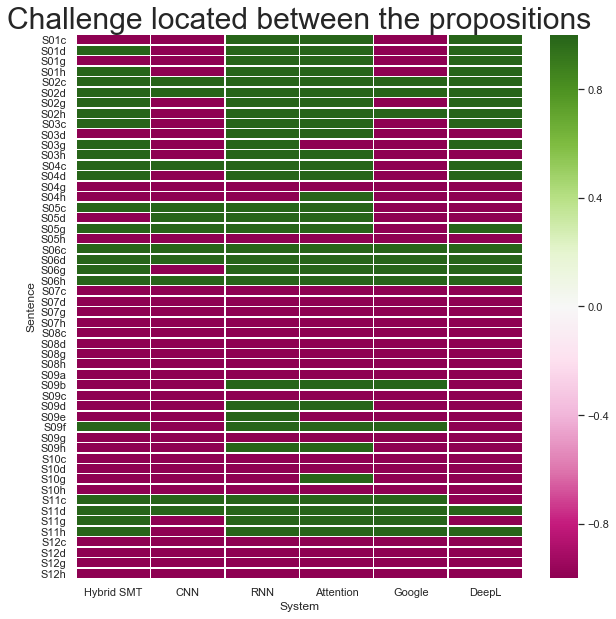

In [7]:
#display results for challenge located between the propositions

between_df = location_sentences.loc[location_sentences['Location'] == 'Mid']
                        
#pivot df for sentences where challenge is located between the propositions
between_results = between_df.pivot('System', 'Sentence', 'Code')

#reorder systems
between_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
between_results.sort_index(level=0, inplace=True)

#create heatmap for sentences where challenge is located between the propositions
sns.set(font_scale=1.0)
between_results_transposed = between_results.transpose()

plt.figure(figsize=(10,10))

display_cs = sns.heatmap(between_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Challenge located between the propositions", fontsize =30)

Text(0.5, 1, 'Sentences with interruption')

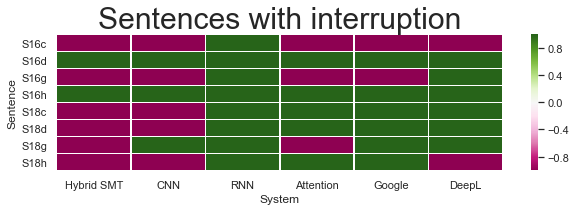

In [8]:
#display results for sentences with interruption

interruption_sentences = pd.DataFrame(df, columns = ['System', 'Sentence', 'Code', 'Interrupted'])
interrupted_df = interruption_sentences.loc[interruption_sentences['Interrupted'] == 'Y']
                        
#pivot df for sentences with interruption
interrupted_results = interrupted_df.pivot('System', 'Sentence', 'Code')

#reorder systems
interrupted_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
interrupted_results.sort_index(level=0, inplace=True)

#create heatmap for sentences where challenge is located before the propositions
sns.set(font_scale=1.0)
interrupted_results_transposed = interrupted_results.transpose()

plt.figure(figsize=(10,2.5))

display_cs = sns.heatmap(interrupted_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Sentences with interruption", fontsize =30)

Text(0.5, 1, 'Sentences without interruption')

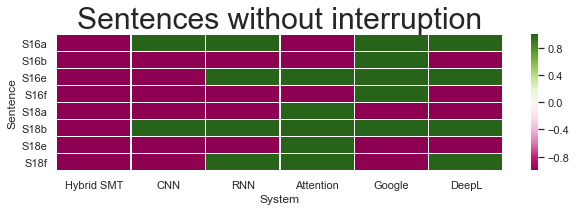

In [9]:
#display results for sentences without interruption

non_interrupted_df = interruption_sentences.loc[interruption_sentences['Interrupted'] == 'N']
                        
#pivot df for sentences without interruption
non_interrupted_results = non_interrupted_df.pivot('System', 'Sentence', 'Code')

#reorder systems
non_interrupted_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
non_interrupted_results.sort_index(level=0, inplace=True)

#create heatmap for sentences where challenge is located before the propositions
sns.set(font_scale=1.0)
non_interrupted_results_transposed = non_interrupted_results.transpose()

plt.figure(figsize=(10,2.5))

display_cs = sns.heatmap(non_interrupted_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Sentences without interruption", fontsize =30)

Text(0.5, 1, 'Clue located before the challenging element')

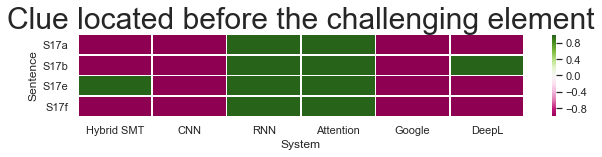

In [10]:
#display results for sentences with clue location

clue_sentences = pd.DataFrame(df, columns = ['System', 'Sentence', 'Code', 'Clue_location'])
clue_before_df = clue_sentences.loc[clue_sentences['Clue_location'] == 'Before']
                        
#pivot df for sentences with clue location
clue_before_results = clue_before_df.pivot('System', 'Sentence', 'Code')

#reorder systems
clue_before_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
clue_before_results.sort_index(level=0, inplace=True)

#create heatmap for sentences where challenge is located before the propositions
sns.set(font_scale=1.0)
clue_before_results_transposed = clue_before_results.transpose()

plt.figure(figsize=(10,1.5))

display_cs = sns.heatmap(clue_before_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Clue located before the challenging element", fontsize =30)

Text(0.5, 1, 'Clue located after the challenging element')

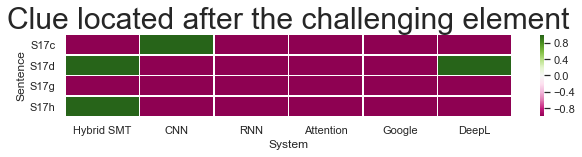

In [11]:
#display results for sentences with clue location

clue_after_df = clue_sentences.loc[clue_sentences['Clue_location'] == 'After']
                        
#pivot df for sentences with clue location
clue_after_results = clue_after_df.pivot('System', 'Sentence', 'Code')

#reorder systems
clue_after_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
clue_after_results.sort_index(level=0, inplace=True)

#create heatmap for sentences where challenge is located before the propositions
sns.set(font_scale=1.0)
clue_after_results_transposed = clue_after_results.transpose()

plt.figure(figsize=(10,1.5))

display_cs = sns.heatmap(clue_after_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Clue located after the challenging element", fontsize =30)

Text(0.5, 1, 'Results for lexical difficulties')

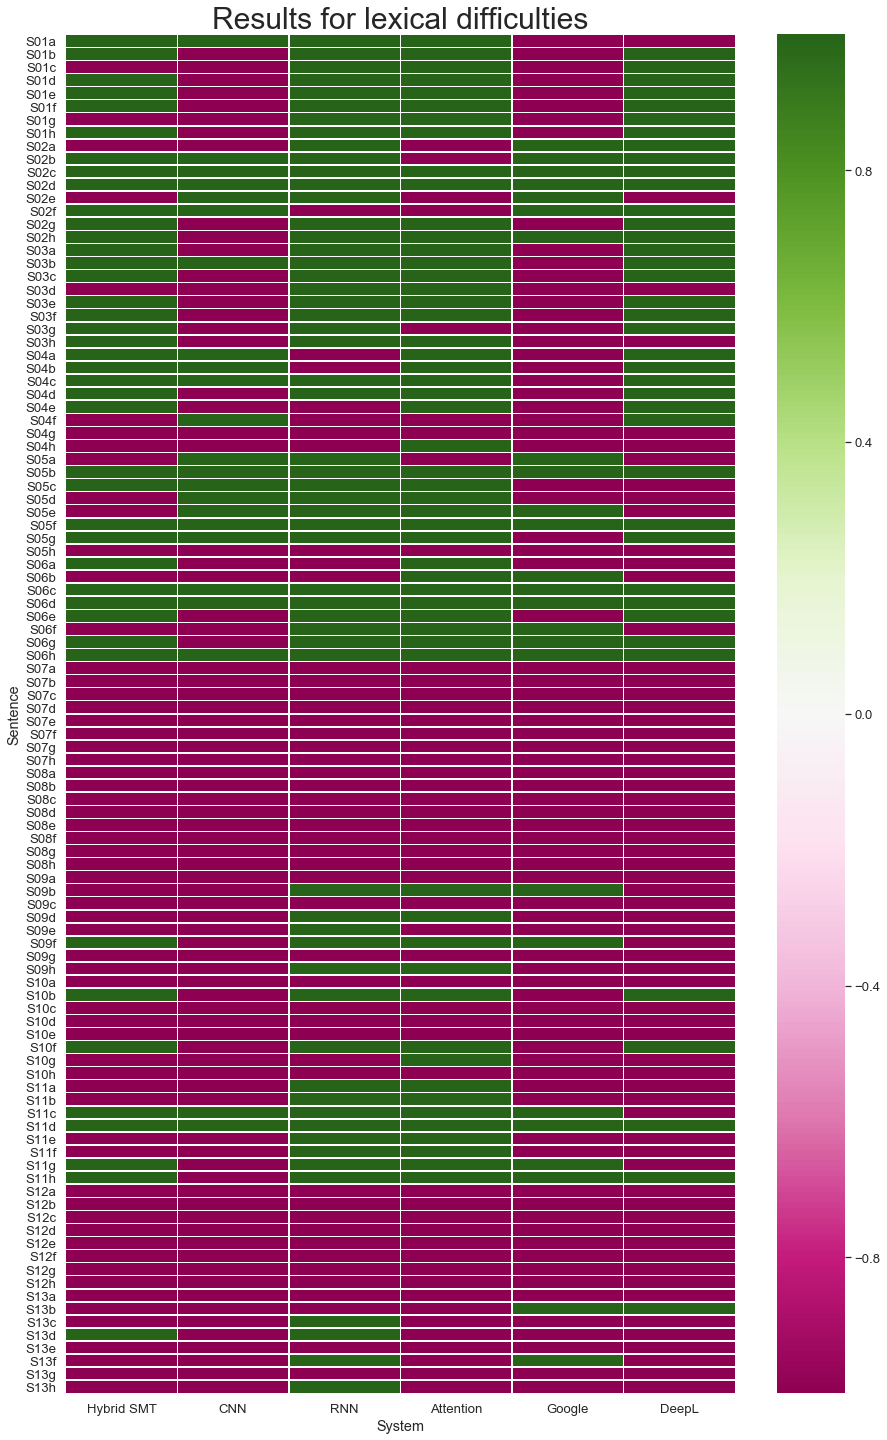

In [12]:
#display results for lexical difficulties

difficulty_sentences = pd.DataFrame(df, columns = ['System', 'Sentence', 'Code', 'Difficulty'])
difficulty_df = difficulty_sentences.loc[difficulty_sentences['Difficulty'] == 'Lexical']
                        
#pivot df for lexical difficulties
difficulty_results = difficulty_df.pivot('System', 'Sentence', 'Code')

#reorder systems
difficulty_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
difficulty_results.sort_index(level=0, inplace=True)

#create heatmap for lexical difficulties
sns.set(font_scale=1.2)

difficulty_results_transposed = difficulty_results.transpose()

plt.figure(figsize=(15,25))

display_cs = sns.heatmap(difficulty_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Results for lexical difficulties", fontsize =30)

Text(0.5, 1, 'Results for syntactic difficulties')

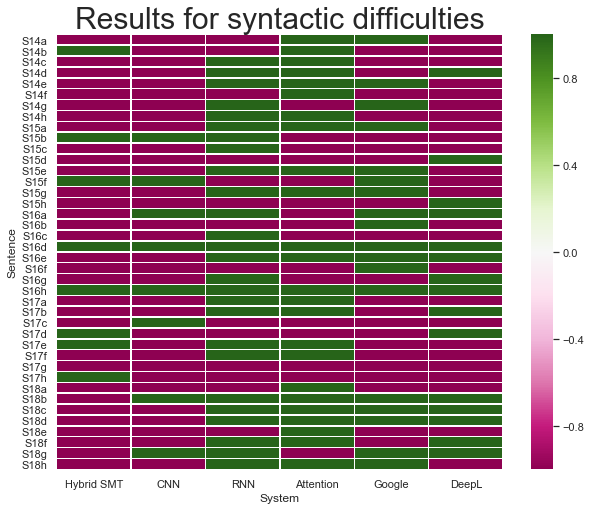

In [13]:
#display results for syntactic difficulties
syntactic_df = difficulty_sentences.loc[difficulty_sentences['Difficulty'] == 'Syntactic']

#pivot df for syntactic difficulties
syntactic_results = syntactic_df.pivot('System', 'Sentence', 'Code')

#reorder systems
syntactic_results.index = pd.CategoricalIndex(challenge_set.index, categories= ["Hybrid SMT", "CNN", "RNN", "Attention", "Google", "DeepL"])
syntactic_results.sort_index(level=0, inplace=True)

#create heatmap for lexical difficulties
sns.set(font_scale=1.0)

syntactic_results_transposed = syntactic_results.transpose()

plt.figure(figsize=(10,8))

display_cs = sns.heatmap(syntactic_results_transposed, xticklabels=True, yticklabels=True, center = 0, linewidths=.5, cmap="PiYG")
plt.title("Results for syntactic difficulties", fontsize =30)